In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./docs/csv/train.csv', sep=";")
print(len(train))
train.head()

7756


,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY","4,7",393,12,6,"3,9","73,4","5,2","13,75",651.0,...,3,"1,267","1,429","2,186",0.0,2.0,1 tbsp,15,.5 oz,0.0
1,"HEARTS OF PALM,CANNED","90,2",28,"2,52","0,62","2,04","4,62","2,4",NaN,58.0,...,NaN,"0,13","0,103","0,202",0.0,146.0,1 cup,33,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...","63,89",196,"24,06","11,09","1,56",0,0,0,13.0,...,0,"2,866","4,878","1,673",130.0,89.0,1 thigh,85,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD","54,73",280,"20,43","21,35","3,51",0,0,0,10.0,...,0,"7,67","10,14","2,32",58.0,140.0,1 cup,85,3 oz,27.0
4,"VINEGAR,DISTILLED","94,78",18,0,0,"0,02","0,04",0,"0,04",6.0,...,0,0,0,0,0.0,14.0,1 tbsp,238,1 cup,0.0


In [3]:
test = pd.read_csv('./docs/csv/test.csv', sep=";")
print(len(test))
test.head()

862


,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,SILK KEY LIME SOY YOGURT,"77,59","2,35","1,18","1,24","17,65","0,6","12,35",176.0,"0,64",...,NaN,0,NaN,NaN,0.0,170.0,1 container,NaN,NaN,0.0
1,"FAST FOODS,SALAD,VEG,TOSSED,WO/DRSNG","95,51","1,25","0,07","0,53","3,22",NaN,NaN,13.0,"0,63",...,NaN,"0,01","0,004","0,034",0.0,104.0,.75 cup,207,1.5 cup,0.0
2,"CUTTLEFISH,MXD SP,CKD,MOIST HEAT","61,12","32,48","1,4","3,36","1,64",0,NaN,180.0,"10,84",...,NaN,"0,236","0,162","0,268",224.0,85.0,3 oz,NaN,NaN,0.0
3,"GROUND TURKEY,93% LN,7% FAT,RAW","72,63","18,73","8,34","0,92",0,0,0,21.0,"1,17",...,0,"2,17","2,843","2,537",74.0,28.0,1 oz,453,1 lb,0.0
4,"TURKEY,RTL PARTS,ENHANCED,BREAST,MEAT ONLY,CKD...","69,99","27,94","2,08","1,4",0,0,0,15.0,"0,59",...,0,"0,428","0,67","0,668",74.0,85.0,3 oz,852,1 breast,24.0


In [4]:
df = pd.read_csv('./docs/csv/gramms_train.csv',  usecols = ['Shrt_Desc'])
print(len(df))
df.head()

7756


,Shrt_Desc
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY"
1,"HEARTS OF PALM,CANNED"
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD..."
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD"
4,"VINEGAR,DISTILLED"


### Средняя длина текстов

In [5]:
len_data = df.Shrt_Desc.apply(len)
len_data.describe()

count    7756.000000
mean       37.966478
std        13.540042
min         3.000000
25%        27.000000
50%        38.000000
75%        49.000000
max        60.000000
Name: Shrt_Desc, dtype: float64

### Длины текстов (в символах)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


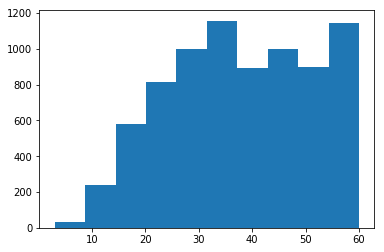

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [7]:
import re
# regex = re.compile("[А-Яа-я]+")
regex = re.compile("[A-Za-z]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

def words_space(text):
    if ',' in text:
        return " ".join(list(text.split(',')))
    else:
        return text


df.Shrt_Desc = df.Shrt_Desc.str.lower()
# print(df.Shrt_Desc[0])
# print(" ".join(list(df.Shrt_Desc[0].split(','))))

df.Shrt_Desc = df.Shrt_Desc.apply(words_only)
df.Shrt_Desc.iloc[0]

'babyfood crl oatmeal w bananas dry'

### Самые частые слова

In [ ]:
from nltk import FreqDist

In [ ]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['Shrt_Desc'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(len(df.Shrt_Desc)):
    print(i)

### Закон Ципфа

In [ ]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()


## Первичная обработка текстов

### Удаление стоп-слов

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

In [ ]:
mystopwords = stopwords.words('english') + ['&', 'w/', '0\"', 'or', '1/8\"', 'only', 'from', 'of', 'not', '/', 'ln'] + ['a','b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
 

In [ ]:
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [ ]:
mystoplemmas = ["german", "tennis", "seasons", "frozen)"]
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""


In [ ]:
df.Shrt_Desc = df.Shrt_Desc.apply(remove_stopwords) 
df.Shrt_Desc = df.Shrt_Desc.apply(lemmatize)
df.Shrt_Desc = df.Shrt_Desc.apply(remove_stoplemmas) 

In [ ]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['Shrt_Desc'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(len(df.Shrt_Desc)):
    print(i[0])

## Извлечение ключевых слов

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS по-сложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

## Links about dictionary words with defenition
https://www.velvetcache.org/2010/03/01/looking-up-words-in-a-dictionary-using-python
https://www.w3resource.com/python-exercises/nltk/nltk-corpus-exercise-6.php

In [ ]:
from nltk.corpus import wordnet 
syns = wordnet.synsets("chick")
print("Defination of the said word:")
print(syns[0].definition())
print("\nExamples of the word in use::")
print(syns[0].examples())

## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [ ]:
from gensim.corpora import *
# df.sort_values(['class'], inplace = True)
texts = [df.Shrt_Desc.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [ ]:
# %%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
print(tfidf[corpus])
corpus_tfidf = tfidf[corpus]

In [ ]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

In [ ]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.Shrt_Desc)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

In [ ]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1]})
sns.FacetGrid(vis_df, size=10).map(plt.scatter, "X", "Y").add_legend()